In [4]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


In [9]:
fldr = "./UTkFace"

In [10]:
import os 
files = os.listdir(fldr)

In [11]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr +'/'+fle
    print(total)
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)


./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

In [12]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)


In [13]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [14]:
#Save images array ,ages and gender array in the system
np.save(fldr+'images.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [15]:
#Finding the number of elements in the dataset
values,counts = np.unique(genders_f,return_counts=True)
print(counts)
#12391 is the number of male images and 11317 is the number of female images

[12391 11317]


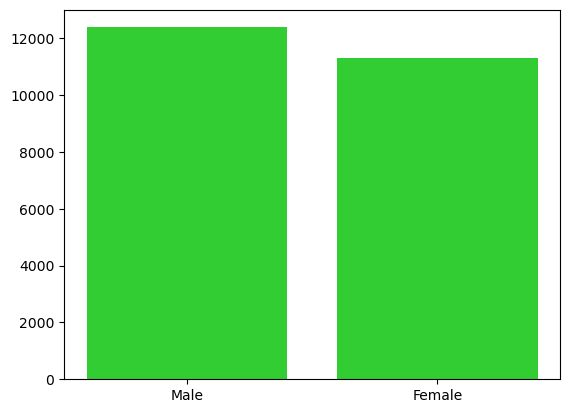

In [35]:
#Plotting the number of male and female samples
Genders = ["Male","Female"]
Values = [12391,11317]
plt.bar(Genders,Values,color = "limegreen")
plt.show()


In [17]:
values1,counts1 = np.unique(ages_f,return_counts = True)
print(counts1)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [18]:
val = values1.tolist()
cnt = counts1.tolist()

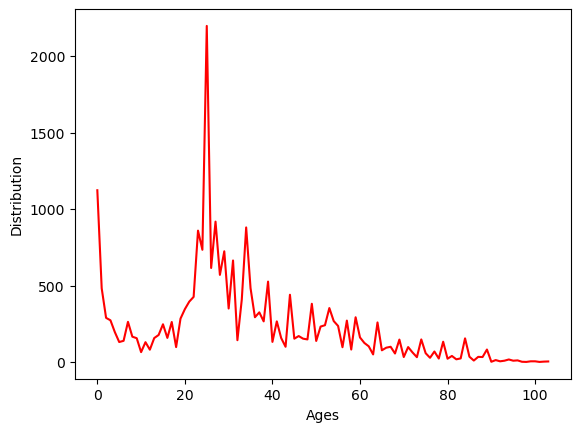

In [19]:
#Plotting the samples agewise 
plt.plot(cnt,color = "red")
plt.xlabel("Ages")
plt.ylabel("Distribution")
plt.show()

In [21]:
#Defining labels for output
labels = []
i = 0
while i<len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i+=1

In [22]:
#Creating another list of images from existing one 
#For better learning
images_f_2 = images_f/255

In [23]:
images_f_2.shape

(23708, 48, 48, 3)

In [24]:
labels_f = np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,Y_train,Y_test= train_test_split(images_f_2,labels_f,test_size=0.25)

In [26]:
#Splitting Y_test and Y_train further 
#for better y=understanding 
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]


In [27]:
#Defining the model
def Covolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [28]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Covolution(inputs,32)
    maxp_1 = MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2 = Covolution(maxp_1,64)
    maxp_2 = MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3 = Covolution(maxp_2,128)
    maxp_3 = MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4 = Covolution(maxp_3,256)
    maxp_4 = MaxPool2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64,activation="relu")(flatten)
    dense_2 = Dense(64,activation="relu")(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1,activation = "sigmoid",name = "gender_output")(drop_1)
    output_2 = Dense(1,activation = "relu",name = "age_output")(drop_2)
    model = Model(inputs = [inputs],outputs = [output_1,output_2])
    model.compile(loss = ["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [29]:
Model = model((48,48,3))

In [30]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
file_name = "Age_Gender_Detection.h5"
checkpoint = ModelCheckpoint(file_name,monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor="val_loss",restore_best_weights=True)
callback_list = [checkpoint,Early_stop]

In [34]:
History = Model.fit(X_train,Y_train_2,batch_size=64,validation_data = (X_test,Y_test_2),epochs = 250,callbacks = callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 18.0003 - gender_output_loss: 0.6908 - age_output_loss: 17.1977 - gender_output_accuracy: 0.5718 - age_output_accuracy: 0.0456
Epoch 1: val_loss improved from inf to 18.55206, saving model to Age_Gender_Detection.h5
278/278 [==============================] - 128s 454ms/step - loss: 18.0003 - gender_output_loss: 0.6908 - age_output_loss: 17.1977 - gender_output_accuracy: 0.5718 - age_output_accuracy: 0.0456 - val_loss: 18.5521 - val_gender_output_loss: 0.6543 - val_age_output_loss: 17.8053 - val_gender_output_accuracy: 0.6580 - val_age_output_accuracy: 0.0466
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 15.1147 - gender_output_loss: 0.6173 - age_output_loss: 14.3821 - gender_output_accuracy: 0.6589 - age_output_accuracy: 0.0476
Epoch 2: val_loss improved from 18.55206 to 13.69926, saving model to Age_Gender_Detection.h5
278/278 [==============================] - 112s 404ms/step - loss: 15.11

In [39]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 14s 77ms/step - loss: 22.8668 - gender_output_loss: 2.0354 - age_output_loss: 20.1621 - gender_output_accuracy: 0.5057 - age_output_accuracy: 0.0466


[22.866830825805664,
 2.035435914993286,
 20.162080764770508,
 0.505652129650116,
 0.04656656086444855]

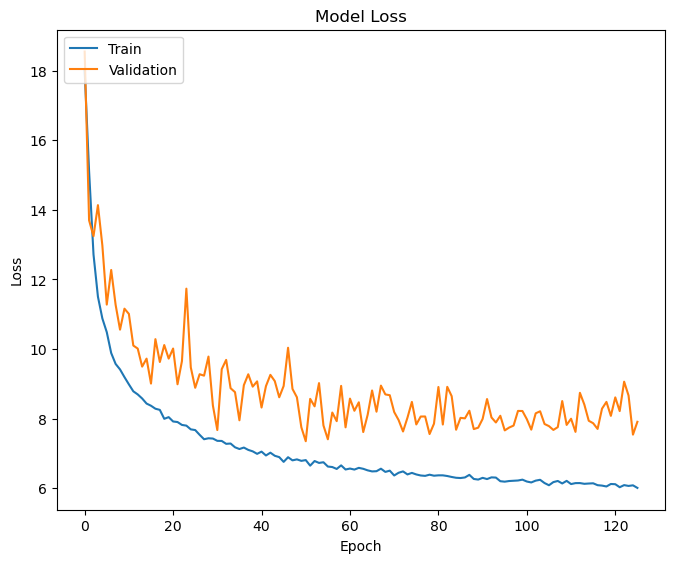

In [41]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

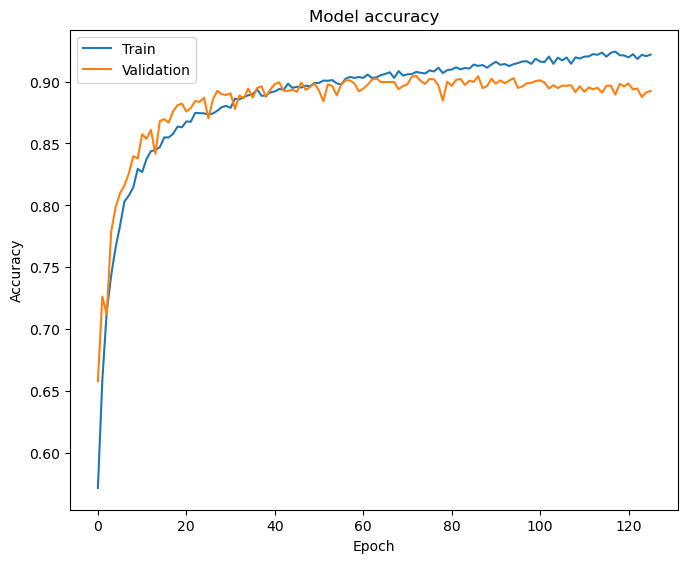

In [43]:
plt.plot(History.history["gender_output_accuracy"])
plt.plot(History.history["val_gender_output_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc = 'upper left')
plt.subplots_adjust(top = 1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


In [46]:
pred = Model.predict(X_test)

186/186 [==============================] - 10s 52ms/step


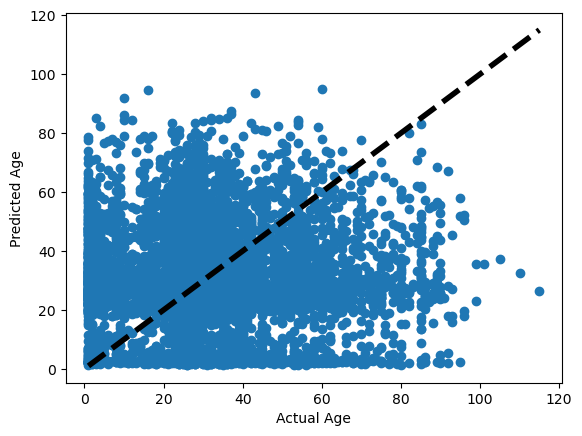

In [47]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],"k--",lw=4)
ax.set_xlabel("Actual Age")
ax.set_ylabel("Predicted Age")
plt.show()

In [48]:
i = 0
Pred_l = []
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1


In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
report = classification_report(Y_test_2[0],Pred_l)

In [51]:
print(report)

              precision    recall  f1-score   support

           0       0.52      0.55      0.54      3086
           1       0.48      0.46      0.47      2841

    accuracy                           0.51      5927
   macro avg       0.50      0.50      0.50      5927
weighted avg       0.50      0.51      0.50      5927



In [52]:
results = confusion_matrix(Y_test_2[0],Pred_l)


<Axes: >

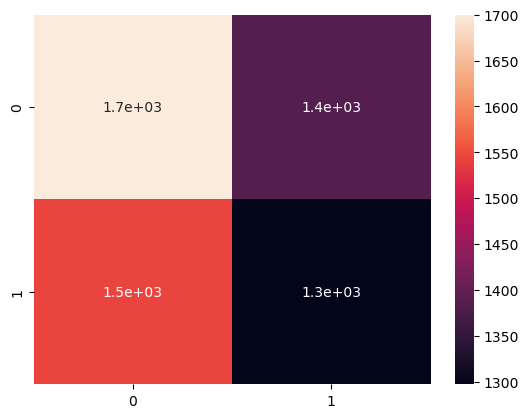

In [53]:
import seaborn as sns
sns.heatmap(results,annot =True)

In [54]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f = ["Male","Female"]
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+sex_f[sex])

1/1 [==============================] - 0s 61ms/step
Predicted Age is 84
Predicted Gender is Female


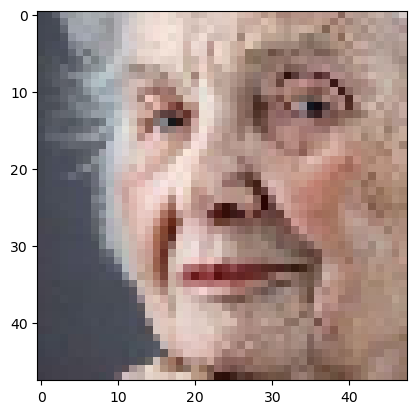

In [55]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 171ms/step
Predicted Age is 11
Predicted Gender is Male


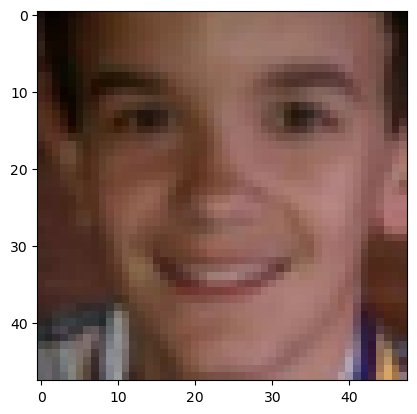

In [56]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 22ms/step
Predicted Age is 11
Predicted Gender is Female


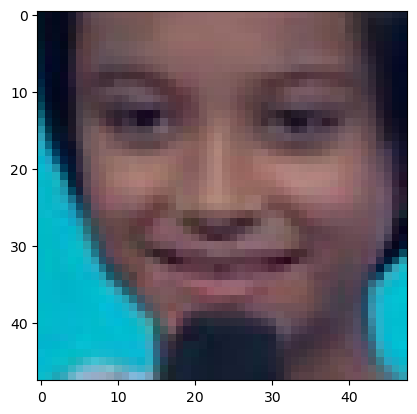

In [57]:
test_image(168,images_f,images_f_2,Model)

1/1 [==============================] - 0s 39ms/step
Predicted Age is 20
Predicted Gender is Male


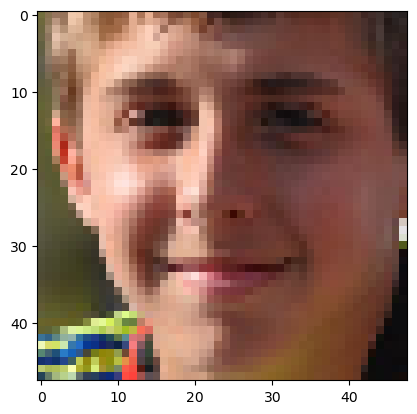

In [58]:
test_image(888,images_f,images_f_2,Model)

1/1 [==============================] - 0s 28ms/step
Predicted Age is 21
Predicted Gender is Female


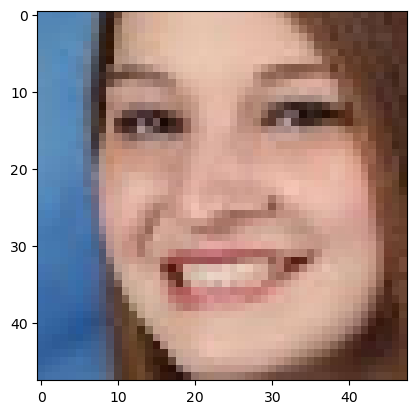

In [59]:
test_image(1288,images_f,images_f_2,Model)